In [ ]:
PART 1:

In [1]:
import pandas as pd
df = pd.read_csv("/Users/juanlillo/Downloads/amz_uk_price_prediction_dataset.csv")

In [3]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [5]:
category_counts = df['category'].value_counts()

top_5_categories = category_counts.head(5)
print(top_5_categories)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


/var/folders/vq/1lrld38j4zg3c7cv2w931jc80000gq/T/ipykernel_5774/1800037912.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index[:10], y=category_counts.values[:10], palette='viridis')


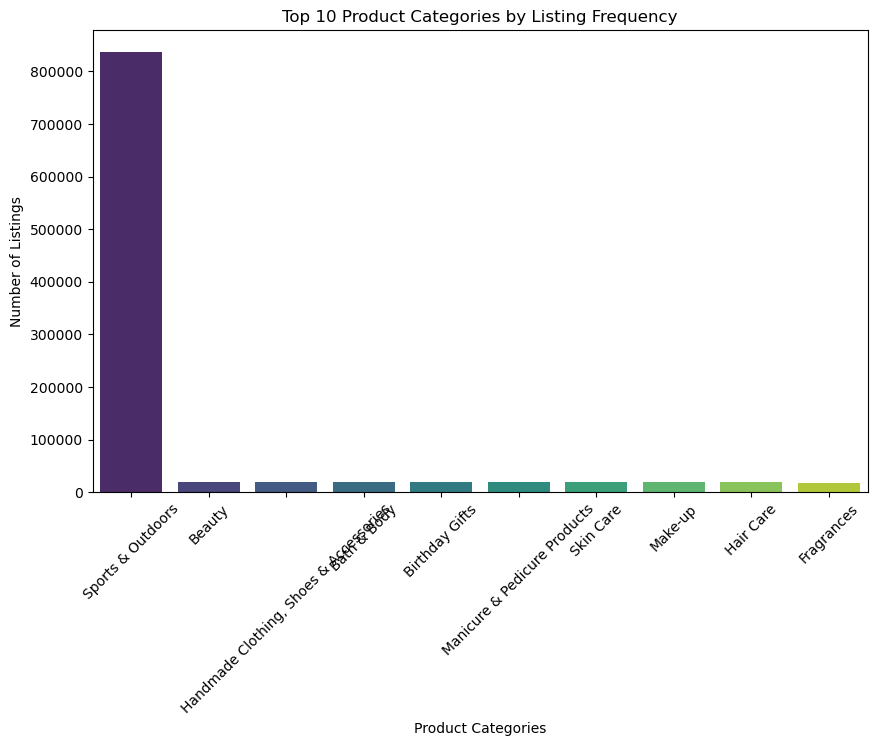

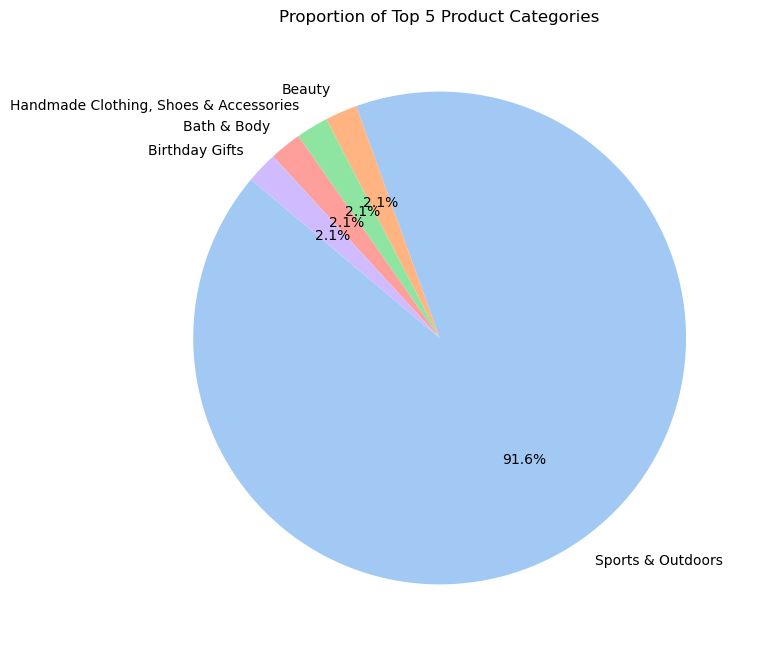

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/Users/juanlillo/Downloads/amz_uk_price_prediction_dataset.csv')

category_counts = df['category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index[:10], y=category_counts.values[:10], palette='viridis')
plt.title('Top 10 Product Categories by Listing Frequency')
plt.ylabel('Number of Listings')
plt.xlabel('Product Categories')
plt.xticks(rotation=45)
plt.show()

top_5_counts = category_counts.head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_counts, labels=top_5_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Top 5 Product Categories')
plt.show()

In [ ]:
PART 2:

In [3]:
import pandas as pd

df = pd.read_csv('/Users/juanlillo/Downloads/amz_uk_price_prediction_dataset.csv')

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])  # Remove any rows where 'price' is NaN

In [7]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]  # In case mode returns multiple values, take the first one

print(f"Average Price (Mean): £{mean_price:.2f}")
print(f"Median Price: £{median_price:.2f}")
print(f"Mode Price: £{mode_price:.2f}")

Average Price (Mean): £89.24
Median Price: £19.09
Mode Price: £9.99


In [9]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print(f"Variance in Price: £{variance_price:.2f}")
print(f"Standard Deviation: £{std_dev_price:.2f}")
print(f"Price Range: £{range_price:.2f}")
print(f"Interquartile Range (IQR): £{iqr_price:.2f}")

Variance in Price: £119445.49
Standard Deviation: £345.61
Price Range: £100000.00
Interquartile Range (IQR): £36.00


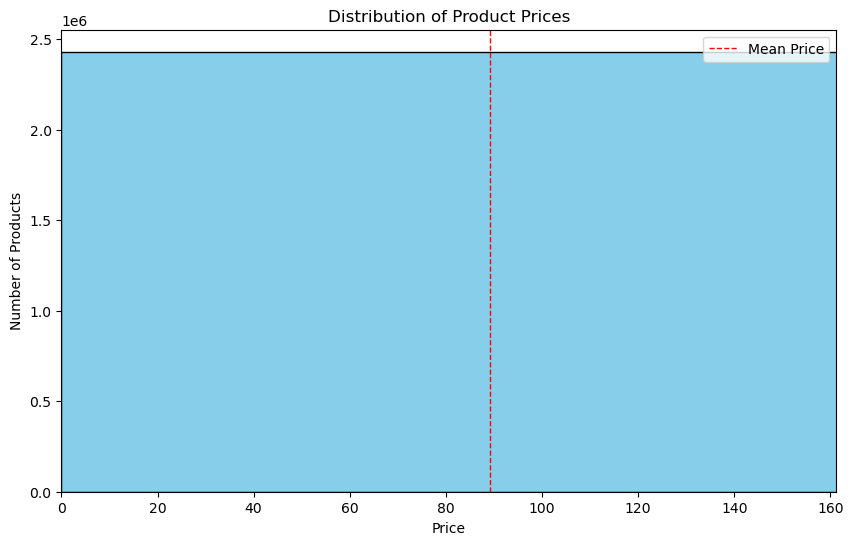

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.xlim(0, 2 * iqr_price + mean_price)  # Focus the plot for readability
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=1, label='Mean Price')
plt.legend()
plt.show()

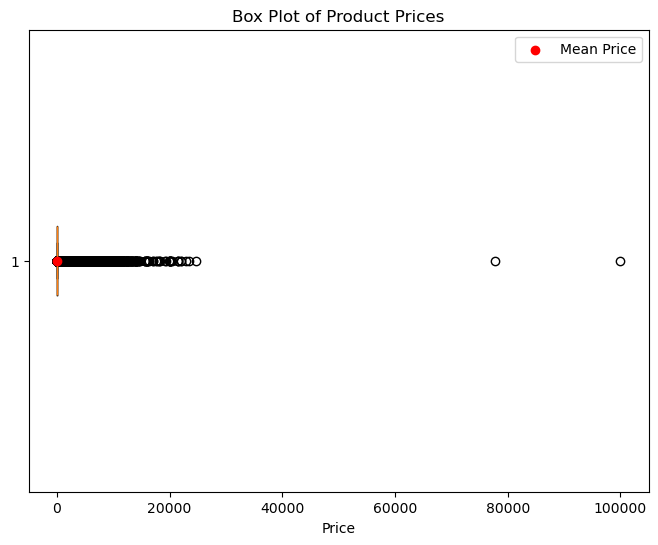

In [13]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'], vert=False)
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')
plt.scatter([mean_price], [1], color='red', zorder=3, label='Mean Price')  # Highlight the mean price
plt.legend()
plt.show()

In [ ]:
PART 3: 


In [52]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [66]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]


In [68]:
mean_rating


2.152836472966065

In [84]:
median_rating

0.0

In [86]:
mode_rating

0.0

In [56]:
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
interquartile_range = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

In [74]:
variance_rating

4.81743402976196

In [76]:
std_dev_rating

2.1948653785054697

In [78]:
interquartile_range

4.4

In [58]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

In [80]:
skewness_rating

0.08120735761080985

In [82]:
kurtosis_rating

-1.9260061280432985

<Axes: title={'center': 'Distribution of Product Stars'}, ylabel='Frequency'>

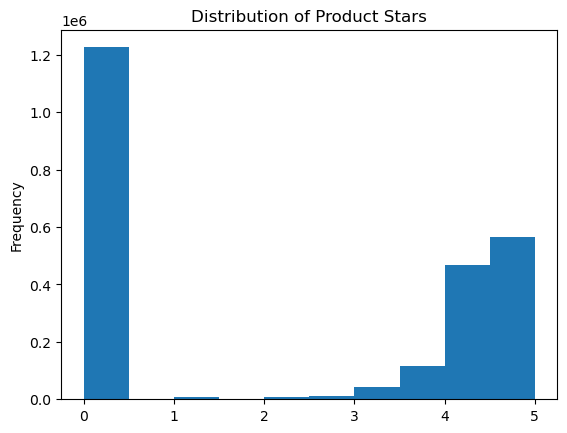

In [88]:
df['stars'].plot(kind='hist', bins=10, title="Distribution of Product Stars")